Davies-Bouldin Index: 0.7212797181816302


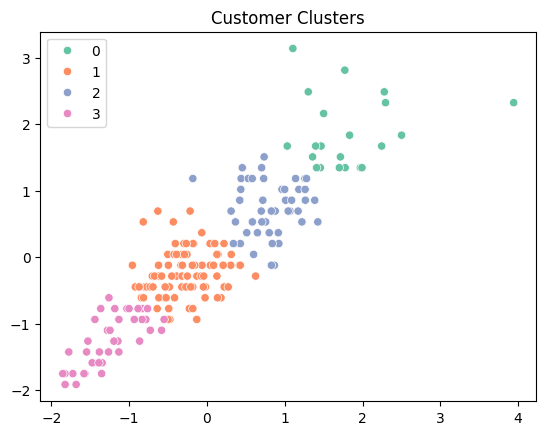

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge data and create features
transactions['TotalSpend'] = transactions['Quantity'] * transactions['Price']
data = transactions.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('CustomerID', axis=1))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data['Cluster'] = clusters

# Calculate DB Index
db_index = davies_bouldin_score(data_scaled, clusters)
print("Davies-Bouldin Index:", db_index)

# Visualize clusters
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='Set2')
plt.title('Customer Clusters')
plt.show()
